# YOLO Model Training

This notebook demonstrates how to use the YOLO model training script for object detection tasks. The script supports training YOLOv8 models of various sizes on custom datasets.

## Prerequisites

Before running the training script, ensure you have:

1. A dataset in YOLOv8 format
2. A `data.yaml` file describing your dataset
3. The required Python packages installed:
   ```bash
   pip install wandb ultralytics
   ```

Note: you will need a wandb account to use the `YOLO_model_training.py` script. Sign up at https://wandb.ai/site and save your API key for use while running the script.


## Available YOLOv8 Models

The script supports different YOLOv8 model sizes:
- `yolov8n.pt` - Nano model (smallest, fastest, least accurate)
- `yolov8s.pt` - Small model
- `yolov8m.pt` - Medium model
- `yolov8l.pt` - Large model
- `yolov8x.pt` - Extra Large model (largest, slowest, most accurate)

## Example Usage

Here are three example configurations for different training scenarios:

### 1. Quick Test Run (YOLOv8n, 10 epochs)

In [ ]:
# Run here or remove the ! to run in terminal
!python YOLO_model_training.py \
--project_name "bee-detection" \
--run_name "yolov8n-test-run" \
--data_yaml "dataset/data.yaml" \
--train_path "dataset/train/images" \
--val_path "dataset/val/images" \
--model_size "n" \
--epochs 10 \
--batch_size 8 \
--image_size 640

### 2. Small Model Training (YOLOv8s, 10 epochs)

In [ ]:
!python YOLO_model_training.py \
--project_name "bee-detection" \
--run_name "yolov8s-training" \
--data_yaml "dataset/data.yaml" \
--train_path "dataset/train/images" \
--val_path "dataset/val/images" \
--model_size "s" \
--epochs 10 \
--batch_size 8 \
--image_size 640

### 3. Full Training Run (YOLOv8n, 100 epochs)

In [ ]:
!python YOLO_model_training.py \
--project_name "bee-detection" \
--run_name "yolov8n-full-training" \
--data_yaml "dataset/data.yaml" \
--train_path "dataset/train/images" \
--val_path "dataset/val/images" \
--model_size "n" \
--epochs 100 \
--batch_size 8 \
--image_size 640

## Parameter Descriptions

- `--project_name`: Name of your Weights & Biases project
- `--run_name`: Name of this specific training run
- `--data_yaml`: Path to your YOLO format data.yaml file
- `--train_path`: Path to your training images directory
- `--val_path`: Path to your validation images directory
- `--model_size`: YOLOv8 model size (n/s/m/l/x)
- `--epochs`: Number of training epochs (default: 100)
- `--batch_size`: Training batch size (default: 16)
- `--image_size`: Input image size (default: 640)

## Notes

- The script automatically uses GPU if available, falling back to MPS (on Mac) or CPU if not
- Training progress is logged to Weights & Biases
- Model checkpoints are saved every 10 epochs
- The script performs validation checks on your dataset before training

## Model Comparison
Let's compare the performance of different YOLO models we've trained. We'll create visualizations and metrics comparisons using the training results.


image 1/1 c:\Users\ethos\Documents\beeYOLO\dataset\val\images\78b6ffff-img14250.png: 384x640 4 bees, 1 feeder, 398.5ms
Speed: 11.4ms preprocess, 398.5ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Users\ethos\Documents\beeYOLO\dataset\val\images\78b6ffff-img14250.png: 384x640 5 bees, 1 feeder, 497.9ms
Speed: 9.2ms preprocess, 497.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Users\ethos\Documents\beeYOLO\dataset\val\images\78b6ffff-img14250.png: 384x640 5 bees, 1 feeder, 203.0ms
Speed: 8.9ms preprocess, 203.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


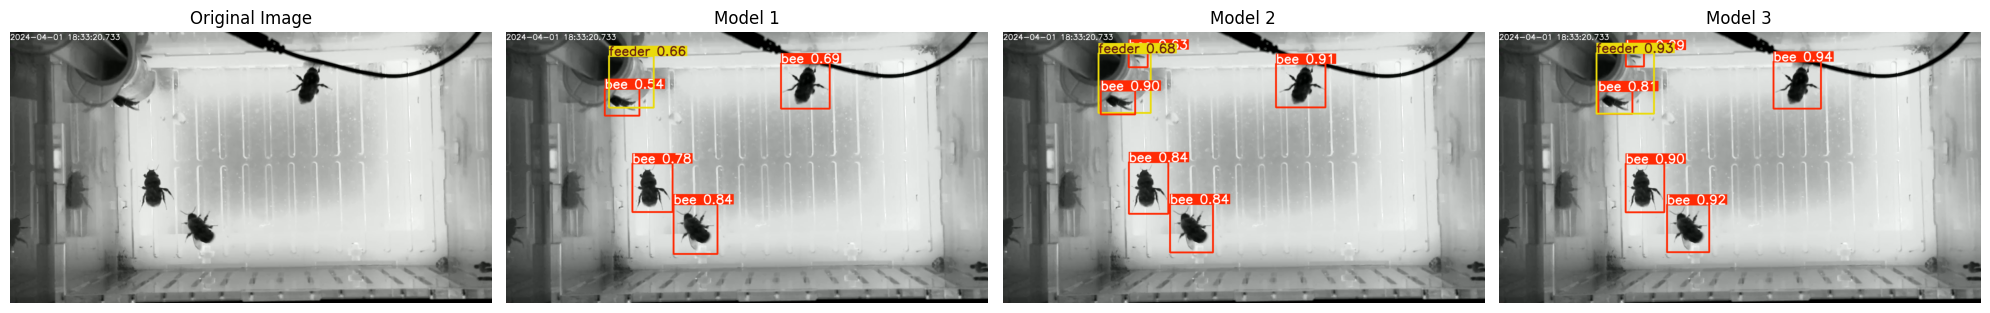

In [3]:
from load_run_metrics import compare_model_predictions

# Define paths for test image and models
# Here you can choose any image from your validation set to test the models
# Make sure you set the correct path to your model runs (folder structure will be similar to the example below)

test_image = "dataset/val/images/78b6ffff-img14250.png"  # Replace with your test image
model_paths = [
    'runs/detect/train5/weights/best.pt',
    'runs/detect/train6/weights/best.pt',
    'runs/detect/train7/weights/best.pt'
]

# Compare model predictions
try:
    compare_model_predictions(model_paths, test_image)
except Exception as e:
    print(f"Error comparing predictions: {e}")


Final Metrics Summary:


,metrics/mAP50(B),metrics/mAP50-95(B),train/box_loss,val/box_loss
model,,,,
YOLOv8n (10 epochs),0.9734,0.5229,1.2552,1.3098
YOLOv8n (100 epochs),0.9866,0.5930,0.7606,1.2539
YOLOv8s (10 epochs),0.9831,0.5471,1.1451,1.2768


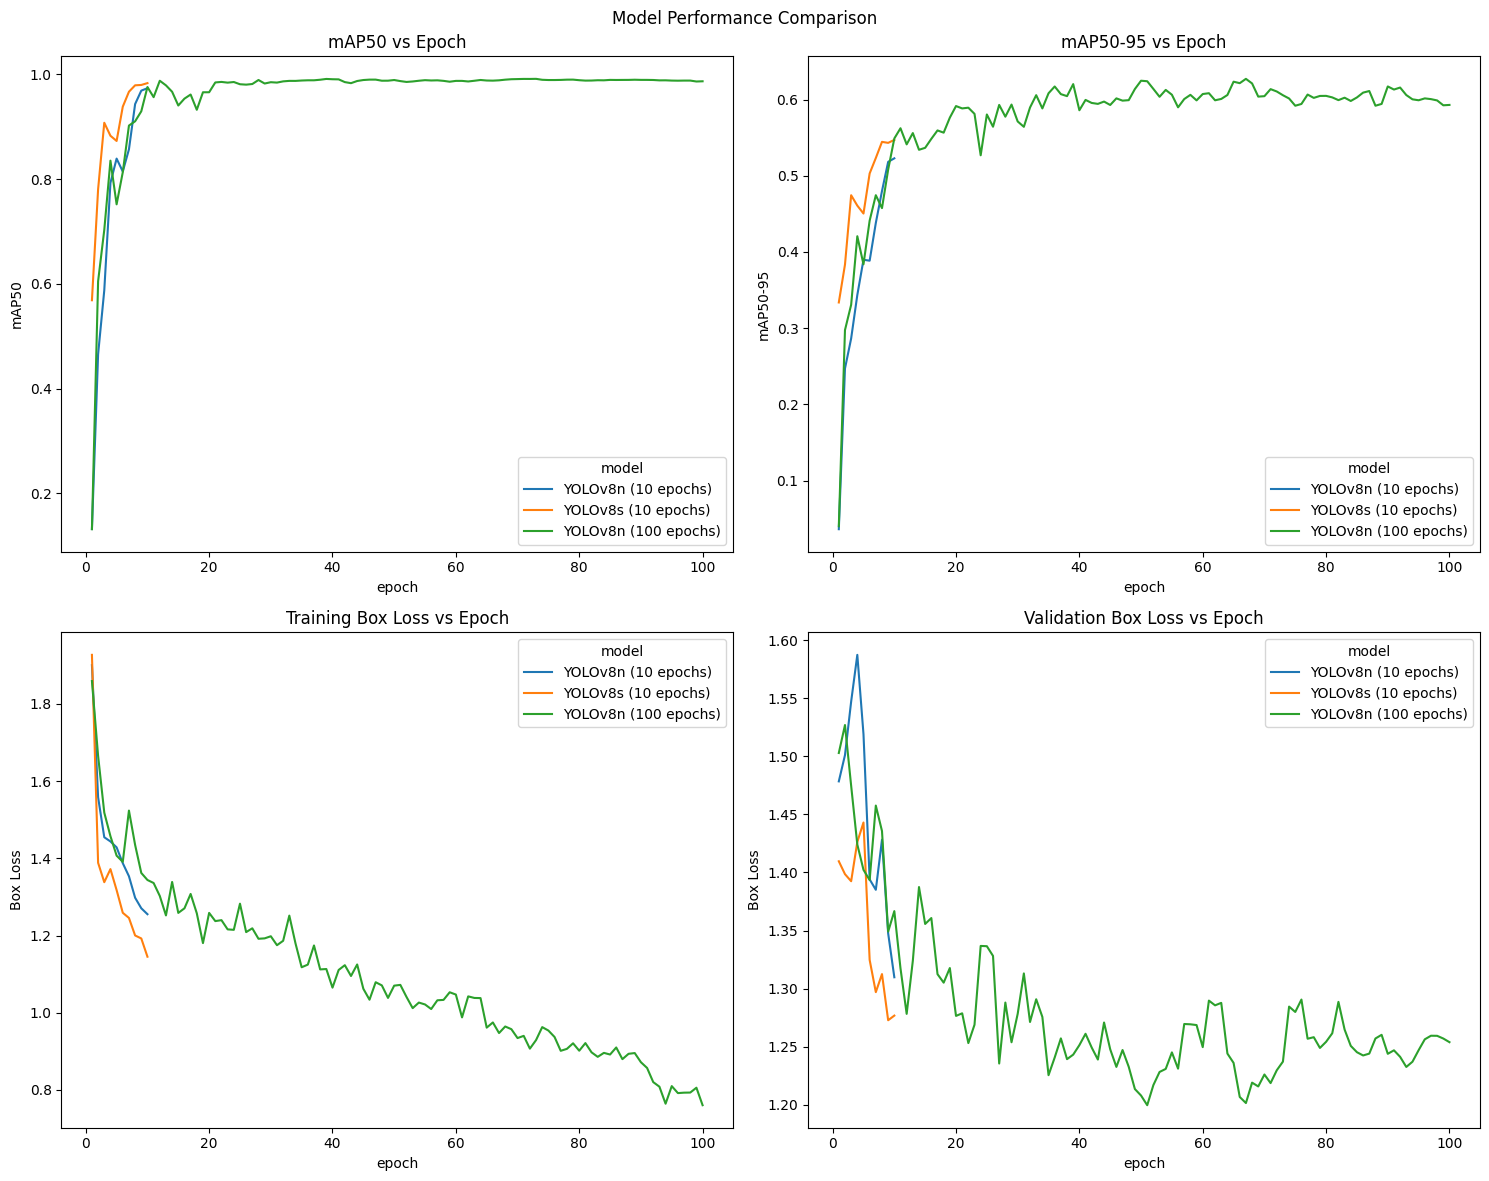

In [5]:
from load_run_metrics import compare_models

# Define paths and names for the training runs
run_dirs = [
    'runs/detect/train5',  # YOLOv8n 10 epochs
    'runs/detect/train6',  # YOLOv8s 10 epochs
    'runs/detect/train7'   # YOLOv8n 100 epochs
]

run_names = [
    'YOLOv8n (10 epochs)',
    'YOLOv8s (10 epochs)',
    'YOLOv8n (100 epochs)'
]

# Compare metrics across models
try:
    metrics_df = compare_models(run_dirs, run_names)
    
    # Print final metrics summary
    print("\nFinal Metrics Summary:")
    final_metrics = metrics_df.groupby('model').last()[
        ['metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'train/box_loss', 'val/box_loss']
    ]
    display(final_metrics.round(4))
    
except Exception as e:
    print(f"Error comparing models: {e}")

### Interpreting the Results

The plots above show several key metrics for comparing model performance:

1. **mAP (Mean Average Precision)**:
   - mAP50: Detection accuracy at 50% IOU threshold
   - mAP50-95: Average detection accuracy across different IOU thresholds
   - Higher values indicate better performance

2. **Loss Metrics**:
   - Training box loss: Shows how well the model is learning
   - Validation box loss: Shows how well the model generalizes
   - Lower values indicate better performance

3. **Model Comparison**:
   - YOLOv8n (10 epochs): Quick training baseline
   - YOLOv8s (10 epochs): Impact of larger model
   - YOLOv8n (100 epochs): Impact of longer training